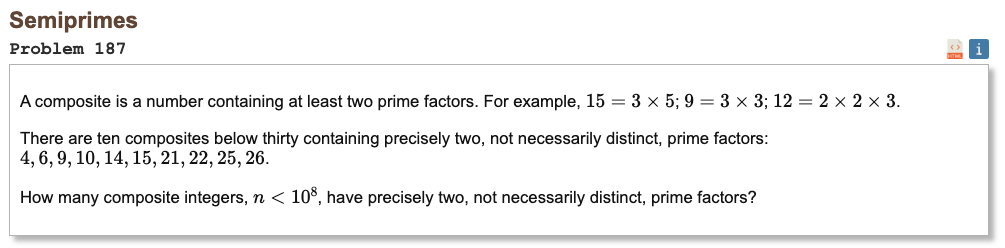

## Initial approach

* generate all primes up to N/2 with a sieve that stores only odd numbers
* build one list of primes from that sieve, including 2 at the start
* any valid composite must be a product p·q where p and q are primes, p·q < N, and p ≤ q
* use two pointers on the prime list, one starting at the smallest primes, one at the largest
* for a fixed p on the left pointer, move the right pointer down until p·q < N holds
* all primes between these two pointers (including the right one) give valid q for this p, so add that count
* stop when p exceeds √N, since then even the smallest q = p would make p·q ≥ N
* the final total is the number of composites below N with exactly two prime factors

In [1]:
from math import isqrt

def count_semiprimes(N):
    limit = N // 2
    if limit < 4:
        return 0
    m = (limit - 1) // 2
    sieve = bytearray(b"\x01") * (m + 1)
    max_i = (isqrt(limit) - 3) // 2
    for i in range(max_i + 1):
        if sieve[i]:
            p = 2 * i + 3
            start = (p * p - 3) // 2
            step = p
            sieve[start::step] = b"\x00" * ((m - start) // step + 1)
    primes = [2]
    primes.extend(2 * i + 3 for i in range(m + 1) if sieve[i])
    count = 0
    j = len(primes) - 1
    rootN = isqrt(N)
    for i, p in enumerate(primes):
        if p > rootN:
            break
        while j >= i and p * primes[j] >= N:
            j -= 1
        if j < i:
            break
        count += j - i + 1
    return count

def euler187():
    return count_semiprimes(10**8)

In [2]:
%%time

result = euler187()
print("Result:", result)

Result: 17427258
CPU times: user 822 ms, sys: 31.6 ms, total: 854 ms
Wall time: 876 ms
